# Exercise 11: The Beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [242]:
# INSERT CODE HERE
library(tidyverse)
library(class)

# create df_bin and select relevant variables, create binarized average split
df_bin <- df %>%
  mutate(price_bin = as.factor(if_else(price >= mean(price), 1, 0))) %>%
  select(carat, depth, table, x, y, price_bin)

# report head and dimensions
head(df_bin)
dim(df_bin)

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price. 

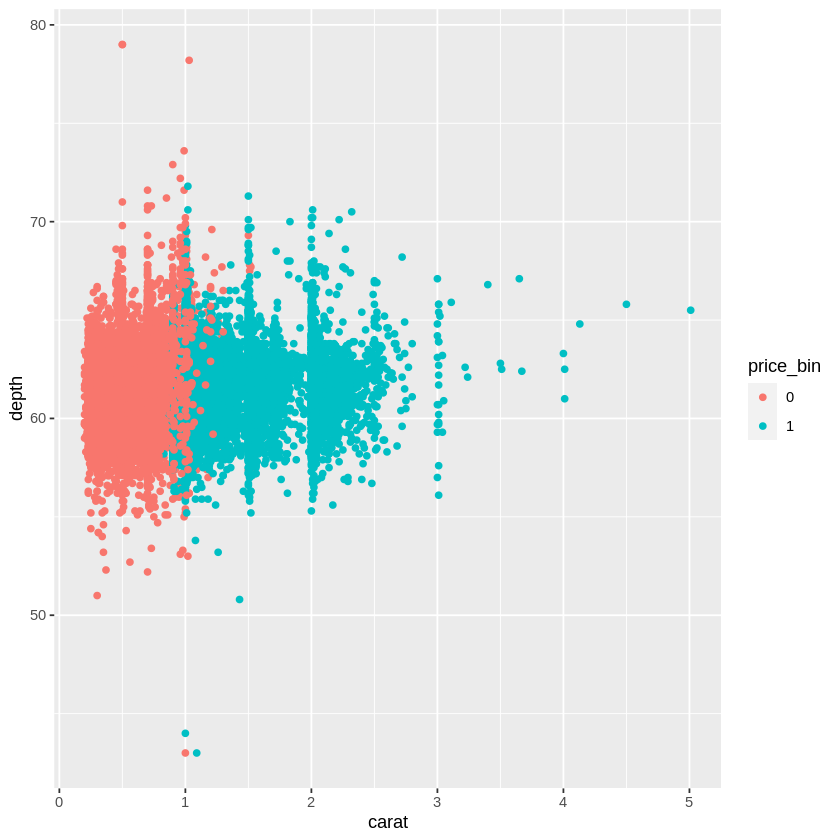

In [243]:
# INSERT CODE HERE
ggplot(df_bin, aes(x = carat, y = depth, color = price_bin)) +
  geom_point()

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> The data are clustered such that values below the mean price are grouped together and distinguishable from those above the mean price. This will likely result in the kNN performing well in classifying above and below mean price diamonds from carat and depth data.
>
> Side note: I don't think this kNN will help at all to predict diabetes diagnoses.


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [249]:
set.seed(2023)

# INSERT CODE HERE

# Assign 30% of rows to test
sample <- sample(c(TRUE, FALSE), nrow(df_bin), replace=TRUE, prob=c(0.7,0.3))

# extract X_train and X_test
train <- df_bin[sample, -6]
test <- df_bin[!sample, -6]

# save Y_train and Y_test for knn()
train_labs <- df_bin$price_bin[sample == TRUE]
test_labs <- df_bin$price_bin[sample == FALSE]

# print dimensions
dim(train)
dim(test)
dim(df_bin)
length(train_labs)
length(test_labs)

[1] 37819     5

[1] 16121     5

[1] 53940     6

[1] 37819

[1] 16121

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`. 


*Hint: Review the format required for the arguments of knn()*

In [250]:
set.seed(2023)

# INSERT CODE HERE
knn_mdl <- knn(cbind(train$carat, train$depth), cbind(test$carat, test$depth), train_labs, k = 3)

Now, output a confusion matrix and calculate the test error to evaluate model performance. 

In [251]:
# INSERT CODE HERE
confusion_df <- data.frame(predicted = knn_mdl,actual = test_labs)
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    0    1
        0 9782  324
        1  494 5521

[1] "---"
[1] "Accuracy: 0.949258730847962"


How did your model perform?
> The model reaches an accuracy of 95%. This corresponds to a test error of around 5%. The model does not appear to bias towards either above or below mean price in terms of its predictions. These results make sense when considering the spatial layout of the classes in the previous scatterplot.
>
> 


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [253]:
set.seed(2023)
# INSERT CODE HERE

# run model with all variables
knn_mdl_full <- knn(train, test, train_labs, k = 3)

# generate confusion matrix
confusion_df_full <- data.frame(predicted = knn_mdl_full,actual = test_labs)
table(confusion_df_full)
print("---")
print(paste("Accuracy:",mean(confusion_df_full$predicted == confusion_df_full$actual)))

         actual
predicted    0    1
        0 9793  392
        1  483 5453

[1] "---"
[1] "Accuracy: 0.945722970039079"


Did your model predictions improve?
> The model accuracy is roughly similar to the accuracy observed when just examining carat and depth. This could be the result of failure to preprocess these data (scaling), or the near ceiling performance observed with only two variables, suggesting that most of the variance in price_bin is explained by carat and depth.
>
> 


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy. 

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`. 

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [254]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [263]:
for (k in seq(1:30)) {
    knn_fits <- knn(cbind(train$carat, train$depth), cbind(test$carat, test$depth), train_labs, k = k) # your knn function here
    conf_df <- data.frame(predicted = knn_fits,actual = test_labs) # data frame of test predictions versus actual test
    output$error[k] <- 1 - mean(conf_df$predicted == conf_df$actual) #calculate error from conf_df and add to your output dataframe
}

head(output)

,k,error
,<int>,<dbl>
1,1,0.05303641
2,2,0.05260220
3,3,0.05067924
4,4,0.04819800
5,5,0.04919050
6,6,0.04838410


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


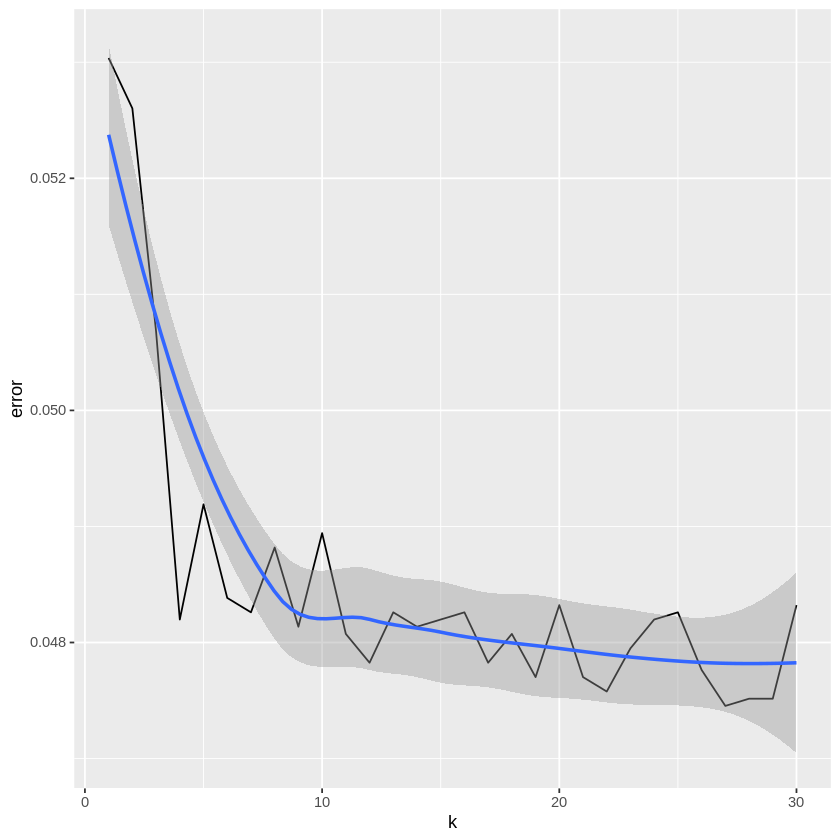

In [264]:
# INSERT CODE HERE
ggplot(output, aes(x = k, y = error)) +
  geom_line() +
  geom_smooth()

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
>  It is important to note that the overall range of test error is only about 0.6%. Based on this plot, I would select a value of k around 10. This is right around the time where the improvements in error level off, and prevents the selection of an overly large k that will result in disproportionate bias and insufficient variance. Choosing a k of 10 represents an improvement of approximately 0.6% compared to k = 3.
>
> 


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [268]:
set.seed(2023)
#INSERT CODE HERE

# scale carat and depth
train_carat_scaled <- scale(train$carat)
train_depth_scaled <- scale(train$depth)
test_carat_scaled <- scale(test$carat)
test_depth_scaled <- scale(test$depth)

# run standardized knn
knn_mdl_final <- knn(cbind(train_carat_scaled, train_depth_scaled), cbind(test_carat_scaled, test_depth_scaled), train_labs, k = 10)

# output confusion matrix and accuracy
confusion_df_final <- data.frame(predicted = knn_mdl_final,actual = test_labs)
table(confusion_df_final)
print("---")
print(paste("Accuracy:",mean(confusion_df_final$predicted == confusion_df_final$actual)))

         actual
predicted    0    1
        0 9784  291
        1  492 5554

[1] "---"
[1] "Accuracy: 0.951429812046399"


What impact did rescaling the data have on your error rate?
> The rescaling performed on carat and depth did not have a strong effect on model performance, likely given the close to ceiling performance already observed in prior models. The selection of a more optimal k value did result in a small bump in accuracy from 0.949 to 0.951.
>
>  


**DUE:** 5pm March 22, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
